# LightGBM
### Parameters:
System:
* **abilities**:
    * **cha**
    * **con**
    * **dex**
    * **int**
    * **str**
    * **wis**
* **attributes**
    * **hp**
    * **ac**
    * **perception**
    * **speed** (*land speed*)
        * **other speeds**: fly, climb, swim
    * **num immunities**
    * **resistances**: fire, cold, electricity, acid, piercing, slashing, physical, bludgeoning, mental, poison, all-damage
    * **weaknesses**: cold-iron, good, fire, cold, area-damage, splash-damage, evil, slashing
* **saves**
    * **fortitude**
    * **reflex**
    * **will**
* **resources**
    * **focus**

Items
* **items**
    * **melee**
    * **ranged**
    * **spells nr**

### Prediction: *level*

## Loading data

In [1]:
import numpy as np
import pandas as pd
import sys

import os
import pathlib

sys.path.append("../../..")
from training.creating_dataset import load_and_preprocess_data

current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path).parent.parent.parent / "pathfinder_2e_data"
DATASET_FILES = [
    "pathfinder-bestiary.db",
    "pathfinder-bestiary-2.db",
    "pathfinder-bestiary-3.db",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
features = [
    "cha",
    "con",
    "dex",
    "int",
    "str",
    "wis",
    "ac",
    "hp",
    "perception",
    "fortitude",
    "reflex",
    "will",
    "focus",
    "land_speed",
    "num_immunities",
    "fly",
    "swim",
    "climb",
    "fire_resistance",
    "cold_resistance",
    "electricity_resistance",
    "acid_resistance",
    "piercing_resistance",
    "slashing_resistance",
    "physical_resistance",
    "bludgeoning_resistance",
    "mental_resistance",
    "poison_resistance",
    "all-damage_resistance",
    "cold-iron_weakness",
    "good_weakness",
    "fire_weakness",
    "cold_weakness",
    "area-damage_weakness",
    "splash-damage_weakness",
    "evil_weakness",
    "slashing_weakness",
    "melee",
    "ranged",
    "spells",
]

df = load_and_preprocess_data(
    DATASET_PATHS,
    characteristics=features,
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1205
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   str                     1206 non-null   int64  
 1   cha                     1206 non-null   int64  
 2   wis                     1206 non-null   int64  
 3   reflex                  1206 non-null   int64  
 4   focus                   1206 non-null   int32  
 5   land_speed              1206 non-null   float64
 6   level                   1206 non-null   int64  
 7   hp                      1206 non-null   int64  
 8   num_immunities          1206 non-null   int64  
 9   fortitude               1206 non-null   int64  
 10  int                     1206 non-null   int64  
 11  perception              1206 non-null   int64  
 12  ac                      1206 non-null   int64  
 13  will                    1206 non-null   int64  
 14  con                     1206 non-null   

In [3]:
df.head()

,str,cha,wis,reflex,focus,land_speed,level,hp,num_immunities,fortitude,...,spells_nr_lvl_4,spells_nr_lvl_5,spells_nr_lvl_6,spells_nr_lvl_7,spells_nr_lvl_8,spells_nr_lvl_9,melee_max_bonus,avg_melee_dmg,ranged_max_bonus,avg_ranged_dmg
0,7,1,2,19,1,30.0,10,215,3,22,...,0,0,0,0,0,0,23,22.0,0,0.0
1,9,1,2,14,0,35.0,10,220,0,21,...,0,0,0,0,0,0,23,22.0,0,0.0
2,7,-2,3,17,0,30.0,8,175,0,20,...,0,0,0,0,0,0,21,16.0,0,0.0
3,7,6,5,29,1,50.0,17,315,3,30,...,1,0,1,0,0,0,33,31.5,0,0.0
4,-5,1,1,10,1,0.0,1,20,0,6,...,1,0,0,0,0,0,0,0.0,8,5.0


###### Level

In [4]:
y = df["level"]
y

0       10
1       10
2        8
3       17
4        1
        ..
1201    20
1202    -1
1203    12
1204     6
1205     6
Name: level, Length: 1206, dtype: int64

In [5]:
from collections import defaultdict


lvl_stat = defaultdict(lambda: 0)

for lvl in y:
    lvl_stat[lvl] += 1

In [6]:
level_count = pd.DataFrame(
    data={
        "lvl": [key for key in sorted(lvl_stat.keys())],
        "count": [lvl_stat.get(key) for key in sorted(lvl_stat.keys())],
    }
)
level_count

,lvl,count
0,-1,34
1,0,27
2,1,127
3,2,121
4,3,95
5,4,82
6,5,76
7,6,72
8,7,77
9,8,68


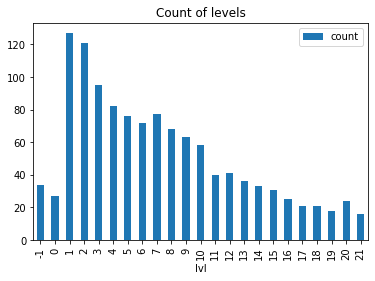

In [7]:
import matplotlib.pyplot as plt


level_count.plot.bar(x="lvl", y="count", title="Count of levels")

plt.savefig(f"../results_diagrams/other/Count of levels.svg")

plt.show()

## Train test split

### Chronological split

In [8]:
from training.splitting_dataset import split_dataframe


os.chdir("../../../training")
X_train, X_test, y_train, y_test = split_dataframe(df, test_size=0.31)
os.chdir("../notebooks/models/lightgbm")

In [9]:
X_train = X_train.drop(columns=["book"])
X_test = X_test.drop(columns=["book"])

### Random split

In [10]:
(
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
) = split_dataframe(df, chronological_split=False)

In [11]:
X_train_random_split = X_train_random_split.drop(columns=["book"])
X_test_random_split = X_test_random_split.drop(columns=["book"])

## LightGBM

## Chronological split

In [12]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 756
[LightGBM] [Info] Number of data points in the train set: 841, number of used features: 45
[LightGBM] [Info] Start training from score 6.966706
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[86]	valid_0's l1: 0.464806	valid_0's l2: 0.925346


In [13]:
y_pred_train = gbm.predict(X_train, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.96
MAE: 0.46


In [15]:
results = pd.DataFrame(
    data={
        "Split type": [],
        "Tuning type": [],
        "Set of features": [],
        "RMSE": [],
        "MAE": [],
    }
)

results.loc[0] = ["chronological", "default", "full", rmse, mae]

In [16]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse_test:.2f}")

RMSE train: 0.13
RMSE test: 0.96


###### MAE by level

In [17]:
from training.results import plot_mae_by_level

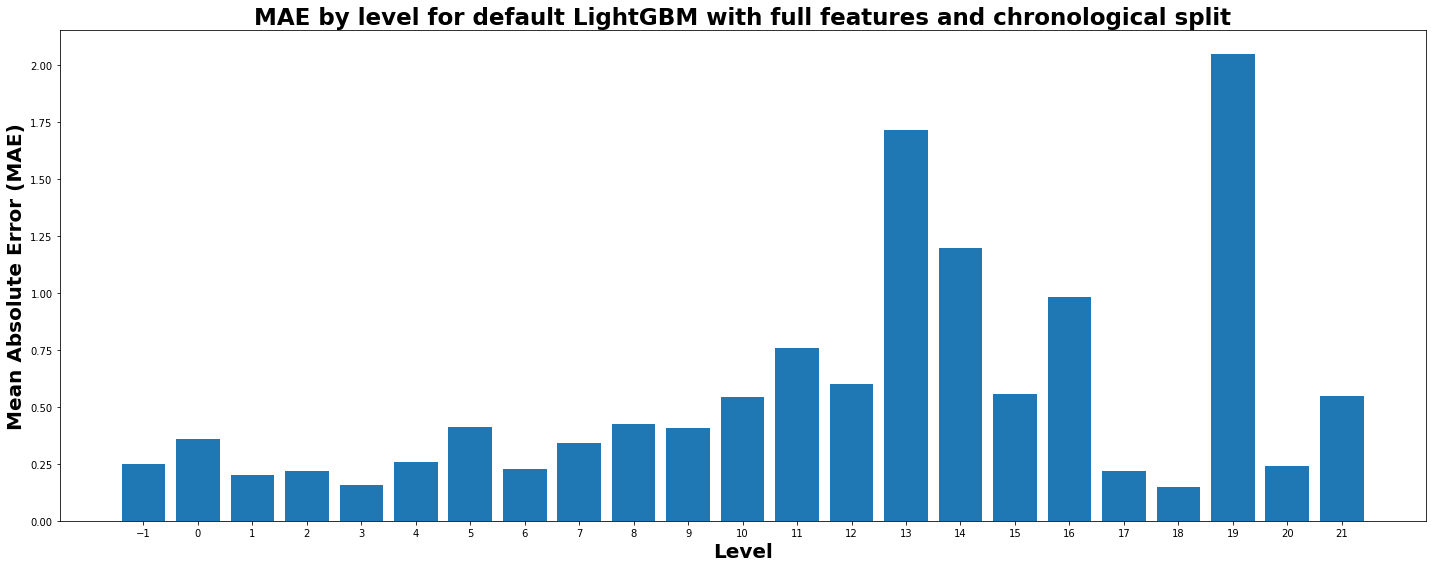

In [18]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for default LightGBM with full features and chronological split",
)

In [19]:
from training.results import evaluate_round_predictions, plot_confusion_matrix


evaluate_round_predictions([0.5, 0.33, 0.45], y_test, y_pred_test)

Default:
RMSE: 0.96

Round type: 0.5
RMSE: 0.99

Round type: 0.33
RMSE: 0.94

Round type: 0.45
RMSE: 0.96



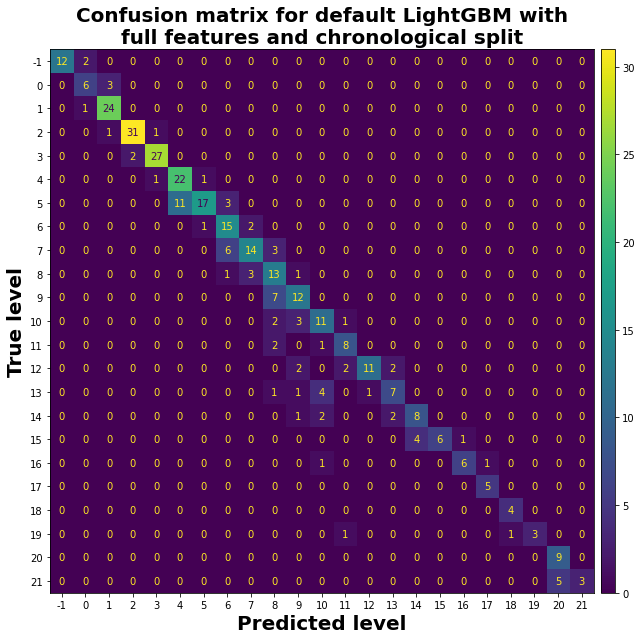

In [20]:
plot_confusion_matrix(
    y_pred_test,
    y_test,
    title="Confusion matrix for default LightGBM with\nfull features and chronological split",
)

#### Tuning

In [21]:
from training.results import assess_regression_model

In [22]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train, y_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-11-24 14:56:07,627] A new study created in memory with name: no-name-39288d82-0010-4d5f-8bc1-185c2966f7b0
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


feature_fraction, val_score: 0.132727:  14%|######4                                      | 1/7 [00:03<00:23,  3.91s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.13879 + 0.0298725
[200]	cv_agg's l2: 0.135362 + 0.0293908
[300]	cv_agg's l2: 0.135029 + 0.0298287
[400]	cv_agg's l2: 0.134899 + 0.0298104


feature_fraction, val_score: 0.132727:  29%|############8                                | 2/7 [00:07<00:18,  3.70s/it]

[500]	cv_agg's l2: 0.134973 + 0.0297964
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.153433 + 0.0361594
[200]	cv_agg's l2: 0.151284 + 0.0361475
[300]	cv_agg's l2: 0.150936 + 0.0360814
[400]	cv_agg's l2: 0.150919 + 0.0362736


feature_fraction, val_score: 0.132727:  43%|###################2                         | 3/7 [00:11<00:15,  3.87s/it]

[500]	cv_agg's l2: 0.150998 + 0.0365614
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.138727 + 0.0326364
[200]	cv_agg's l2: 0.136173 + 0.0321761
[300]	cv_agg's l2: 0.13599 + 0.0320788
[400]	cv_agg's l2: 0.135615 + 0.0320907


feature_fraction, val_score: 0.132727:  57%|#########################7                   | 4/7 [00:15<00:11,  3.99s/it]

[500]	cv_agg's l2: 0.135613 + 0.032065
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.146694 + 0.0335893
[200]	cv_agg's l2: 0.144161 + 0.0335346
[300]	cv_agg's l2: 0.143979 + 0.0343847
[400]	cv_agg's l2: 0.143508 + 0.0340938


feature_fraction, val_score: 0.132727:  71%|################################1            | 5/7 [00:19<00:08,  4.09s/it]

[500]	cv_agg's l2: 0.143423 + 0.0338463
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.152385 + 0.0290252
[200]	cv_agg's l2: 0.147601 + 0.0280117
[300]	cv_agg's l2: 0.147283 + 0.0284284
[400]	cv_agg's l2: 0.147173 + 0.0285159


feature_fraction, val_score: 0.132727:  86%|######################################5      | 6/7 [00:25<00:04,  4.55s/it]

[500]	cv_agg's l2: 0.147514 + 0.0286679
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.158721 + 0.0342888
[200]	cv_agg's l2: 0.15295 + 0.0333958
[300]	cv_agg's l2: 0.150434 + 0.0326883
[400]	cv_agg's l2: 0.149566 + 0.0324207


feature_fraction, val_score: 0.132727: 100%|#############################################| 7/7 [00:30<00:00,  4.40s/it]


[500]	cv_agg's l2: 0.149068 + 0.0321487
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417


num_leaves, val_score: 0.132727:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:   5%|##5                                               | 1/20 [00:05<01:41,  5.36s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  10%|#####                                             | 2/20 [00:09<01:20,  4.49s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  15%|#######5                                          | 3/20 [00:13<01:16,  4.49s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  20%|##########                                        | 4/20 [00:19<01:17,  4.82s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  25%|############5                                     | 5/20 [00:23<01:10,  4.69s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  30%|###############                                   | 6/20 [00:27<01:04,  4.60s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.137827 + 0.0316021
[200]	cv_agg's l2: 0.134248 + 0.0311297
[300]	cv_agg's l2: 0.133189 + 0.0310579
[400]	cv_agg's l2: 0.13292 + 0.0312309


num_leaves, val_score: 0.132727:  35%|#################5                                | 7/20 [00:32<00:57,  4.43s/it]

[500]	cv_agg's l2: 0.132867 + 0.031318
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  40%|####################                              | 8/20 [00:36<00:54,  4.55s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  45%|######################5                           | 9/20 [00:41<00:51,  4.72s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  50%|########################5                        | 10/20 [00:46<00:48,  4.80s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  55%|##########################9                      | 11/20 [00:52<00:46,  5.13s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  60%|#############################4                   | 12/20 [00:58<00:41,  5.19s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.227685 + 0.0290268
[200]	cv_agg's l2: 0.206248 + 0.0290491
[300]	cv_agg's l2: 0.191588 + 0.0304824
[400]	cv_agg's l2: 0.184309 + 0.0313202


num_leaves, val_score: 0.132727:  65%|###############################8                 | 13/20 [00:59<00:27,  3.98s/it]

[500]	cv_agg's l2: 0.177 + 0.0304834
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  70%|##################################3              | 14/20 [01:04<00:25,  4.28s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  75%|####################################7            | 15/20 [01:09<00:22,  4.52s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  80%|#######################################2         | 16/20 [01:14<00:19,  4.79s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  85%|#########################################6       | 17/20 [01:20<00:15,  5.10s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335
[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417


num_leaves, val_score: 0.132727:  90%|############################################1    | 18/20 [01:29<00:12,  6.22s/it]

[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727:  95%|##############################################5  | 19/20 [01:35<00:06,  6.19s/it]

[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.1378 + 0.0299665
[200]	cv_agg's l2: 0.134116 + 0.0281015
[300]	cv_agg's l2: 0.133249 + 0.0284213
[400]	cv_agg's l2: 0.132823 + 0.0284335


num_leaves, val_score: 0.132727: 100%|#################################################| 20/20 [01:41<00:00,  5.09s/it]


[500]	cv_agg's l2: 0.132843 + 0.0284245
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417


bagging, val_score: 0.132727:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.166537 + 0.0279961
[200]	cv_agg's l2: 0.155848 + 0.0204663
[300]	cv_agg's l2: 0.155269 + 0.0179191
[400]	cv_agg's l2: 0.155301 + 0.0189697


bagging, val_score: 0.132727:  10%|#####3                                               | 1/10 [00:04<00:39,  4.44s/it]

[500]	cv_agg's l2: 0.155115 + 0.0186011
Early stopping, best iteration is:
[407]	cv_agg's l2: 0.132727 + 0.028417
[100]	cv_agg's l2: 0.136559 + 0.029752
[200]	cv_agg's l2: 0.133364 + 0.0286051
[300]	cv_agg's l2: 0.132559 + 0.0284281
[400]	cv_agg's l2: 0.132337 + 0.0280948
[500]	cv_agg's l2: 0.131964 + 0.0278942
[600]	cv_agg's l2: 0.131824 + 0.0276625


bagging, val_score: 0.131784:  20%|##########6                                          | 2/10 [00:13<00:57,  7.17s/it]

[700]	cv_agg's l2: 0.131819 + 0.0274863
Early stopping, best iteration is:
[608]	cv_agg's l2: 0.131784 + 0.0276333
[100]	cv_agg's l2: 0.136636 + 0.0300264
[200]	cv_agg's l2: 0.132089 + 0.0284555
[300]	cv_agg's l2: 0.130998 + 0.0282275
[400]	cv_agg's l2: 0.13074 + 0.0282462
[500]	cv_agg's l2: 0.130529 + 0.0281082


bagging, val_score: 0.130409:  20%|##########6                                          | 2/10 [00:20<00:57,  7.17s/it]

[600]	cv_agg's l2: 0.130597 + 0.0279961
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


bagging, val_score: 0.130409:  30%|###############9                                     | 3/10 [00:20<00:49,  7.09s/it]

[100]	cv_agg's l2: 0.14085 + 0.0326901
[200]	cv_agg's l2: 0.137734 + 0.0329484
[300]	cv_agg's l2: 0.137341 + 0.0327377
[400]	cv_agg's l2: 0.136588 + 0.0323242
[500]	cv_agg's l2: 0.136471 + 0.0320713
[600]	cv_agg's l2: 0.136505 + 0.0320085
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


bagging, val_score: 0.130409:  40%|#####################2                               | 4/10 [00:29<00:45,  7.66s/it]

[100]	cv_agg's l2: 0.137596 + 0.0307349
[200]	cv_agg's l2: 0.133443 + 0.0293999
[300]	cv_agg's l2: 0.132599 + 0.0288489
[400]	cv_agg's l2: 0.132366 + 0.0284377
[500]	cv_agg's l2: 0.132147 + 0.0281709


bagging, val_score: 0.130409:  40%|#####################2                               | 4/10 [00:36<00:45,  7.66s/it]

[600]	cv_agg's l2: 0.132172 + 0.0279669
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


bagging, val_score: 0.130409:  50%|##########################5                          | 5/10 [00:36<00:37,  7.58s/it]

[100]	cv_agg's l2: 0.136636 + 0.0300264
[200]	cv_agg's l2: 0.132089 + 0.0284555
[300]	cv_agg's l2: 0.130998 + 0.0282275
[400]	cv_agg's l2: 0.13074 + 0.0282462
[500]	cv_agg's l2: 0.130529 + 0.0281082


bagging, val_score: 0.130409:  50%|##########################5                          | 5/10 [00:43<00:37,  7.58s/it]

[600]	cv_agg's l2: 0.130597 + 0.0279961
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


bagging, val_score: 0.130409:  60%|###############################8                     | 6/10 [00:43<00:29,  7.41s/it]

[100]	cv_agg's l2: 0.13819 + 0.0330635
[200]	cv_agg's l2: 0.135441 + 0.0336241
[300]	cv_agg's l2: 0.134695 + 0.0335639
[400]	cv_agg's l2: 0.134606 + 0.0332047
[500]	cv_agg's l2: 0.134591 + 0.0331265
[600]	cv_agg's l2: 0.13458 + 0.0329856


bagging, val_score: 0.130409:  70%|#####################################                | 7/10 [00:50<00:21,  7.09s/it]

Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803
[100]	cv_agg's l2: 0.141882 + 0.0286492
[200]	cv_agg's l2: 0.137198 + 0.0286165
[300]	cv_agg's l2: 0.136562 + 0.0287062
[400]	cv_agg's l2: 0.136146 + 0.0284788
[500]	cv_agg's l2: 0.135934 + 0.0283134


bagging, val_score: 0.130409:  70%|#####################################                | 7/10 [00:57<00:21,  7.09s/it]

[600]	cv_agg's l2: 0.135996 + 0.0281828
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


bagging, val_score: 0.130409:  80%|##########################################4          | 8/10 [00:57<00:14,  7.32s/it]

[100]	cv_agg's l2: 0.137151 + 0.0330926
[200]	cv_agg's l2: 0.132903 + 0.0305653
[300]	cv_agg's l2: 0.131745 + 0.0302757
[400]	cv_agg's l2: 0.131502 + 0.0301125
[500]	cv_agg's l2: 0.131256 + 0.0297328


bagging, val_score: 0.130409:  80%|##########################################4          | 8/10 [01:04<00:14,  7.32s/it]

[600]	cv_agg's l2: 0.131279 + 0.0296816
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


bagging, val_score: 0.130409:  90%|###############################################7     | 9/10 [01:04<00:06,  7.00s/it]

[100]	cv_agg's l2: 0.144804 + 0.0212902
[200]	cv_agg's l2: 0.140317 + 0.0186406
[300]	cv_agg's l2: 0.138304 + 0.0173395
[400]	cv_agg's l2: 0.137992 + 0.0173715
[500]	cv_agg's l2: 0.137846 + 0.0177806
[600]	cv_agg's l2: 0.137527 + 0.0179747
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


feature_fraction_stage2, val_score: 0.130409:   0%|                                              | 0/6 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.156782 + 0.0314085
[200]	cv_agg's l2: 0.150988 + 0.0324973
[300]	cv_agg's l2: 0.149266 + 0.0326171
[400]	cv_agg's l2: 0.148922 + 0.0316428
[500]	cv_agg's l2: 0.148796 + 0.0314995
[600]	cv_agg's l2: 0.148793 + 0.0313425
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


feature_fraction_stage2, val_score: 0.130409:  17%|######3                               | 1/6 [00:06<00:31,  6.22s/it]

[100]	cv_agg's l2: 0.136747 + 0.0282901
[200]	cv_agg's l2: 0.132746 + 0.0267531
[300]	cv_agg's l2: 0.132295 + 0.0268842
[400]	cv_agg's l2: 0.132224 + 0.0269081
[500]	cv_agg's l2: 0.13223 + 0.0269893


feature_fraction_stage2, val_score: 0.130409:  17%|######3                               | 1/6 [00:12<00:31,  6.22s/it]

[600]	cv_agg's l2: 0.132305 + 0.0269142
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


feature_fraction_stage2, val_score: 0.130409:  33%|############6                         | 2/6 [00:12<00:25,  6.38s/it]

[100]	cv_agg's l2: 0.140713 + 0.0339127
[200]	cv_agg's l2: 0.136247 + 0.0320545
[300]	cv_agg's l2: 0.136025 + 0.0316093
[400]	cv_agg's l2: 0.136107 + 0.0313833
[500]	cv_agg's l2: 0.136088 + 0.0312785


feature_fraction_stage2, val_score: 0.130409:  33%|############6                         | 2/6 [00:18<00:25,  6.38s/it]

[600]	cv_agg's l2: 0.136105 + 0.0312
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


feature_fraction_stage2, val_score: 0.130409:  50%|###################                   | 3/6 [00:19<00:19,  6.34s/it]

[100]	cv_agg's l2: 0.137997 + 0.0328915
[200]	cv_agg's l2: 0.135068 + 0.0309103
[300]	cv_agg's l2: 0.134446 + 0.030301
[400]	cv_agg's l2: 0.134606 + 0.0306853
[500]	cv_agg's l2: 0.134742 + 0.0308427
[600]	cv_agg's l2: 0.134727 + 0.0308241


feature_fraction_stage2, val_score: 0.130409:  67%|#########################3            | 4/6 [00:25<00:12,  6.25s/it]

Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803
[100]	cv_agg's l2: 0.135312 + 0.0307867
[200]	cv_agg's l2: 0.132316 + 0.0310345
[300]	cv_agg's l2: 0.131824 + 0.0305716
[400]	cv_agg's l2: 0.131252 + 0.0307653
[500]	cv_agg's l2: 0.131137 + 0.0307045


feature_fraction_stage2, val_score: 0.130409:  67%|#########################3            | 4/6 [00:31<00:12,  6.25s/it]

[600]	cv_agg's l2: 0.131185 + 0.0308308
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


feature_fraction_stage2, val_score: 0.130409:  83%|###############################6      | 5/6 [00:31<00:06,  6.40s/it]

[100]	cv_agg's l2: 0.139808 + 0.0329047
[200]	cv_agg's l2: 0.137561 + 0.0321583
[300]	cv_agg's l2: 0.137414 + 0.0315912
[400]	cv_agg's l2: 0.137578 + 0.031911
[500]	cv_agg's l2: 0.137539 + 0.0320488
[600]	cv_agg's l2: 0.137648 + 0.0319348
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


regularization_factors, val_score: 0.130409:   0%|                                              | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.141744 + 0.0342192
[200]	cv_agg's l2: 0.136799 + 0.0347613
[300]	cv_agg's l2: 0.136329 + 0.0343976
[400]	cv_agg's l2: 0.136458 + 0.0344166
[500]	cv_agg's l2: 0.136458 + 0.0344166


regularization_factors, val_score: 0.130409:   5%|#9                                    | 1/20 [00:03<01:01,  3.22s/it]

[600]	cv_agg's l2: 0.136458 + 0.0344166
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803
[100]	cv_agg's l2: 0.146796 + 0.0331879
[200]	cv_agg's l2: 0.141322 + 0.0311646
[300]	cv_agg's l2: 0.14011 + 0.0310431
[400]	cv_agg's l2: 0.139661 + 0.0306511
[500]	cv_agg's l2: 0.139569 + 0.0303233


regularization_factors, val_score: 0.130409:  10%|###8                                  | 2/20 [00:09<01:25,  4.75s/it]

[600]	cv_agg's l2: 0.139453 + 0.030442
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803
[100]	cv_agg's l2: 0.199602 + 0.0398559
[200]	cv_agg's l2: 0.198357 + 0.0398786
[300]	cv_agg's l2: 0.198355 + 0.0398802
[400]	cv_agg's l2: 0.198355 + 0.0398802
[500]	cv_agg's l2: 0.198355 + 0.0398802


regularization_factors, val_score: 0.130409:  15%|#####7                                | 3/20 [00:10<00:56,  3.33s/it]

[600]	cv_agg's l2: 0.198355 + 0.0398802
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803
[100]	cv_agg's l2: 0.14746 + 0.0248579
[200]	cv_agg's l2: 0.140117 + 0.0241659
[300]	cv_agg's l2: 0.138699 + 0.023944
[400]	cv_agg's l2: 0.138028 + 0.0239312
[500]	cv_agg's l2: 0.137759 + 0.0239449


regularization_factors, val_score: 0.130409:  15%|#####7                                | 3/20 [00:18<00:56,  3.33s/it]

[600]	cv_agg's l2: 0.137918 + 0.0240215
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


regularization_factors, val_score: 0.130409:  20%|#######6                              | 4/20 [00:18<01:19,  4.94s/it]

[100]	cv_agg's l2: 0.138119 + 0.0321985
[200]	cv_agg's l2: 0.134301 + 0.0299198
[300]	cv_agg's l2: 0.1337 + 0.0295277
[400]	cv_agg's l2: 0.13389 + 0.0293922
[500]	cv_agg's l2: 0.133965 + 0.0292736


regularization_factors, val_score: 0.130409:  25%|#########5                            | 5/20 [00:24<01:20,  5.40s/it]

[600]	cv_agg's l2: 0.134047 + 0.0291849
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803
[100]	cv_agg's l2: 0.136972 + 0.0296652
[200]	cv_agg's l2: 0.1335 + 0.0282207
[300]	cv_agg's l2: 0.132945 + 0.0277907
[400]	cv_agg's l2: 0.132486 + 0.027876
[500]	cv_agg's l2: 0.132277 + 0.0276793
[600]	cv_agg's l2: 0.132223 + 0.0275419


regularization_factors, val_score: 0.130409:  30%|###########4                          | 6/20 [00:30<01:20,  5.75s/it]

Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803
[100]	cv_agg's l2: 0.136191 + 0.030529
[200]	cv_agg's l2: 0.132771 + 0.0302546
[300]	cv_agg's l2: 0.132071 + 0.0299862
[400]	cv_agg's l2: 0.131852 + 0.029692
[500]	cv_agg's l2: 0.131939 + 0.0295583
[600]	cv_agg's l2: 0.131923 + 0.0293928
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


regularization_factors, val_score: 0.130409:  35%|#############3                        | 7/20 [00:37<01:17,  5.99s/it]

[100]	cv_agg's l2: 0.13788 + 0.0307485
[200]	cv_agg's l2: 0.134856 + 0.0293323
[300]	cv_agg's l2: 0.133825 + 0.0298909
[400]	cv_agg's l2: 0.133745 + 0.0298796
[500]	cv_agg's l2: 0.133537 + 0.0296705


regularization_factors, val_score: 0.130409:  35%|#############3                        | 7/20 [00:43<01:17,  5.99s/it]

[600]	cv_agg's l2: 0.13339 + 0.0295357
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


regularization_factors, val_score: 0.130409:  40%|###############2                      | 8/20 [00:43<01:13,  6.13s/it]

[100]	cv_agg's l2: 0.136191 + 0.030529
[200]	cv_agg's l2: 0.132771 + 0.0302546
[300]	cv_agg's l2: 0.132071 + 0.0299862
[400]	cv_agg's l2: 0.131929 + 0.0298184
[500]	cv_agg's l2: 0.132055 + 0.0297476


regularization_factors, val_score: 0.130409:  40%|###############2                      | 8/20 [00:50<01:13,  6.13s/it]

[600]	cv_agg's l2: 0.132048 + 0.0295978
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


regularization_factors, val_score: 0.130409:  45%|#################1                    | 9/20 [00:50<01:08,  6.20s/it]

[100]	cv_agg's l2: 0.136558 + 0.0301257
[200]	cv_agg's l2: 0.132638 + 0.0292404
[300]	cv_agg's l2: 0.131913 + 0.0292643
[400]	cv_agg's l2: 0.131753 + 0.0289138
[500]	cv_agg's l2: 0.131629 + 0.0285019


regularization_factors, val_score: 0.130409:  50%|##################5                  | 10/20 [00:56<01:03,  6.37s/it]

[600]	cv_agg's l2: 0.131604 + 0.0285134
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803
[100]	cv_agg's l2: 0.136447 + 0.0297494
[200]	cv_agg's l2: 0.132218 + 0.0286584
[300]	cv_agg's l2: 0.131085 + 0.0282873
[400]	cv_agg's l2: 0.130861 + 0.0283295
[500]	cv_agg's l2: 0.130725 + 0.0283761


regularization_factors, val_score: 0.130409:  50%|##################5                  | 10/20 [01:03<01:03,  6.37s/it]

[600]	cv_agg's l2: 0.130694 + 0.0284054
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


regularization_factors, val_score: 0.130409:  55%|####################3                | 11/20 [01:03<00:57,  6.34s/it]

[100]	cv_agg's l2: 0.136447 + 0.0297494
[200]	cv_agg's l2: 0.132215 + 0.028654
[300]	cv_agg's l2: 0.131342 + 0.0287014
[400]	cv_agg's l2: 0.13102 + 0.028588
[500]	cv_agg's l2: 0.13095 + 0.0288054
[600]	cv_agg's l2: 0.1308 + 0.0287176


regularization_factors, val_score: 0.130409:  60%|######################2              | 12/20 [01:09<00:50,  6.26s/it]

Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803
[100]	cv_agg's l2: 0.136447 + 0.0297494
[200]	cv_agg's l2: 0.132218 + 0.0286584
[300]	cv_agg's l2: 0.131085 + 0.0282873
[400]	cv_agg's l2: 0.130861 + 0.0283295
[500]	cv_agg's l2: 0.130725 + 0.0283761


regularization_factors, val_score: 0.130409:  60%|######################2              | 12/20 [01:16<00:50,  6.26s/it]

[600]	cv_agg's l2: 0.130694 + 0.0284054
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


regularization_factors, val_score: 0.130409:  65%|########################             | 13/20 [01:16<00:46,  6.62s/it]

[100]	cv_agg's l2: 0.136447 + 0.0297494
[200]	cv_agg's l2: 0.132215 + 0.028654
[300]	cv_agg's l2: 0.131342 + 0.0287014
[400]	cv_agg's l2: 0.13102 + 0.028588
[500]	cv_agg's l2: 0.130972 + 0.0287801


regularization_factors, val_score: 0.130409:  65%|########################             | 13/20 [01:22<00:46,  6.62s/it]

[600]	cv_agg's l2: 0.130854 + 0.0286682
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


regularization_factors, val_score: 0.130409:  70%|#########################9           | 14/20 [01:22<00:39,  6.55s/it]

[100]	cv_agg's l2: 0.136447 + 0.0297494
[200]	cv_agg's l2: 0.132215 + 0.028654
[300]	cv_agg's l2: 0.131342 + 0.0287014
[400]	cv_agg's l2: 0.13102 + 0.028588
[500]	cv_agg's l2: 0.13095 + 0.0288054


regularization_factors, val_score: 0.130409:  75%|###########################7         | 15/20 [01:29<00:32,  6.51s/it]

[600]	cv_agg's l2: 0.1308 + 0.0287176
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803
[100]	cv_agg's l2: 0.136447 + 0.0297494
[200]	cv_agg's l2: 0.132218 + 0.0286584
[300]	cv_agg's l2: 0.131085 + 0.0282873
[400]	cv_agg's l2: 0.130861 + 0.0283295
[500]	cv_agg's l2: 0.130725 + 0.0283761


regularization_factors, val_score: 0.130409:  75%|###########################7         | 15/20 [01:35<00:32,  6.51s/it]

[600]	cv_agg's l2: 0.130694 + 0.0284054
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


regularization_factors, val_score: 0.130409:  80%|#############################6       | 16/20 [01:35<00:25,  6.49s/it]

[100]	cv_agg's l2: 0.136447 + 0.0297494
[200]	cv_agg's l2: 0.132218 + 0.0286584
[300]	cv_agg's l2: 0.131039 + 0.0282933
[400]	cv_agg's l2: 0.130758 + 0.0283533
[500]	cv_agg's l2: 0.130754 + 0.0282462


regularization_factors, val_score: 0.130409:  80%|#############################6       | 16/20 [01:42<00:25,  6.49s/it]

[600]	cv_agg's l2: 0.130829 + 0.0281758
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


regularization_factors, val_score: 0.130409:  85%|###############################4     | 17/20 [01:42<00:19,  6.64s/it]

[100]	cv_agg's l2: 0.136447 + 0.0297494
[200]	cv_agg's l2: 0.132218 + 0.0286584
[300]	cv_agg's l2: 0.131039 + 0.0282933
[400]	cv_agg's l2: 0.130758 + 0.0283533
[500]	cv_agg's l2: 0.130754 + 0.0282462


regularization_factors, val_score: 0.130409:  85%|###############################4     | 17/20 [01:48<00:19,  6.64s/it]

[600]	cv_agg's l2: 0.130829 + 0.0281758
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


regularization_factors, val_score: 0.130409:  90%|#################################3   | 18/20 [01:48<00:12,  6.50s/it]

[100]	cv_agg's l2: 0.136447 + 0.0297494
[200]	cv_agg's l2: 0.132218 + 0.0286584
[300]	cv_agg's l2: 0.131039 + 0.0282933
[400]	cv_agg's l2: 0.130758 + 0.0283533
[500]	cv_agg's l2: 0.130754 + 0.0282462


regularization_factors, val_score: 0.130409:  90%|#################################3   | 18/20 [01:54<00:12,  6.50s/it]

[600]	cv_agg's l2: 0.130829 + 0.0281758
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


regularization_factors, val_score: 0.130409:  95%|###################################1 | 19/20 [01:54<00:06,  6.35s/it]

[100]	cv_agg's l2: 0.136447 + 0.0297494
[200]	cv_agg's l2: 0.132218 + 0.0286584
[300]	cv_agg's l2: 0.131039 + 0.0282933
[400]	cv_agg's l2: 0.130758 + 0.0283533
[500]	cv_agg's l2: 0.130754 + 0.0282462


regularization_factors, val_score: 0.130409:  95%|###################################1 | 19/20 [02:01<00:06,  6.35s/it]

[600]	cv_agg's l2: 0.130829 + 0.0281758
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803


min_data_in_leaf, val_score: 0.130409:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.156981 + 0.0329564
[200]	cv_agg's l2: 0.151138 + 0.0318929
[300]	cv_agg's l2: 0.14997 + 0.0325351
[400]	cv_agg's l2: 0.15028 + 0.0326327
[500]	cv_agg's l2: 0.150623 + 0.031793


min_data_in_leaf, val_score: 0.130409:  20%|#########                                    | 1/5 [00:05<00:20,  5.15s/it]

[600]	cv_agg's l2: 0.150886 + 0.0316705
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803
[100]	cv_agg's l2: 0.726417 + 0.120204
[200]	cv_agg's l2: 0.685945 + 0.130795
[300]	cv_agg's l2: 0.671933 + 0.136236
[400]	cv_agg's l2: 0.667833 + 0.136725
[500]	cv_agg's l2: 0.660417 + 0.135841


min_data_in_leaf, val_score: 0.130409:  40%|##################                           | 2/5 [00:07<00:09,  3.31s/it]

[600]	cv_agg's l2: 0.655769 + 0.134298
Early stopping, best iteration is:
[518]	cv_agg's l2: 0.130409 + 0.0279803
[100]	cv_agg's l2: 0.131551 + 0.029186
[200]	cv_agg's l2: 0.130236 + 0.02936
[300]	cv_agg's l2: 0.130336 + 0.0296842


min_data_in_leaf, val_score: 0.130225:  60%|###########################                  | 3/5 [00:10<00:06,  3.46s/it]

Early stopping, best iteration is:
[221]	cv_agg's l2: 0.130225 + 0.0294488
[100]	cv_agg's l2: 0.131808 + 0.0248412
[200]	cv_agg's l2: 0.130993 + 0.0248704
[300]	cv_agg's l2: 0.130715 + 0.0248964


min_data_in_leaf, val_score: 0.130225:  80%|####################################         | 4/5 [00:14<00:03,  3.70s/it]

Early stopping, best iteration is:
[221]	cv_agg's l2: 0.130225 + 0.0294488
[100]	cv_agg's l2: 0.21781 + 0.0410849
[200]	cv_agg's l2: 0.205215 + 0.0389067


min_data_in_leaf, val_score: 0.130225: 100%|#############################################| 5/5 [00:16<00:00,  3.35s/it]

[300]	cv_agg's l2: 0.203141 + 0.0397816
Early stopping, best iteration is:
[221]	cv_agg's l2: 0.130225 + 0.0294488


In [23]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.1302246680623486
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 0.0
    lambda_l2: 0.0
    num_leaves: 31
    feature_fraction: 0.6
    bagging_fraction: 0.99779185607284
    bagging_freq: 1
    min_child_samples: 10


In [24]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [25]:
rmse, mae = assess_regression_model(lgb_tuned, X_train, X_test, y_train, y_test)

RMSE train: 0.00
RMSE test: 0.80
MAE test: 0.43



In [26]:
results.loc[1] = [
    "chronological",
    "Optuna",
    "full",
    rmse,
    mae,
]

###### MAE by level

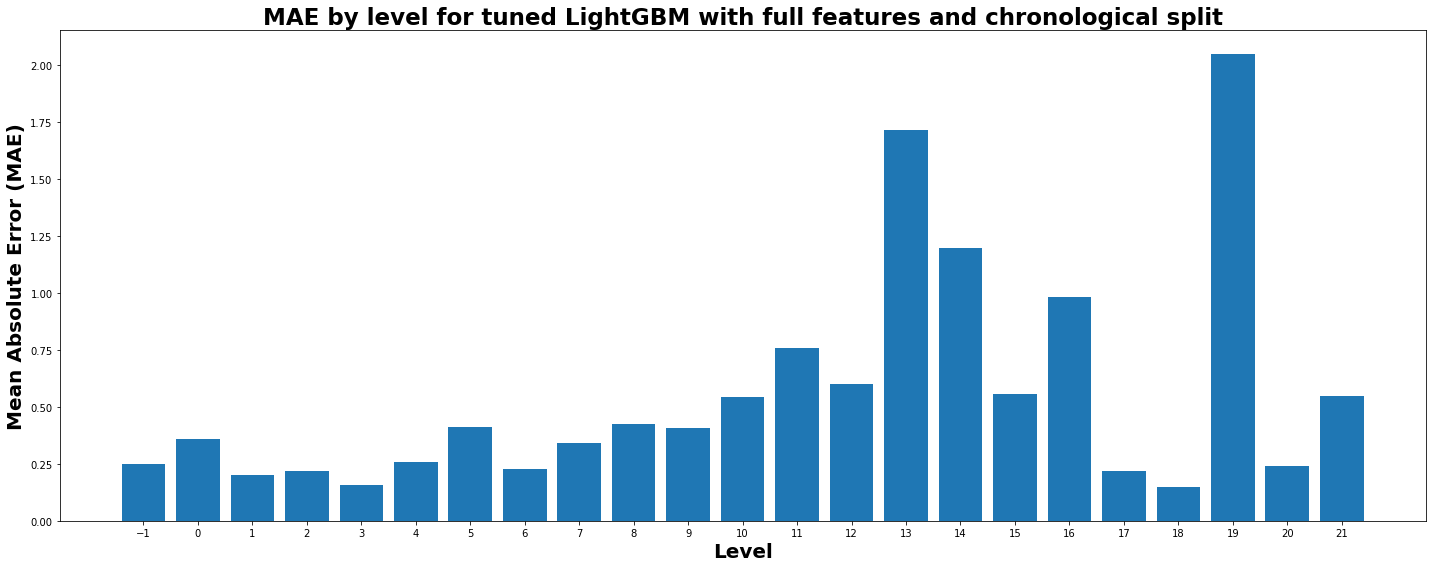

In [27]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for tuned LightGBM with full features and chronological split",
    export=True,
)

In [28]:
predict = lgb_tuned.predict(X_test)
evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.80

Round type: 0.5
RMSE: 0.82

Round type: 0.33
RMSE: 0.78

Round type: 0.45
RMSE: 0.80



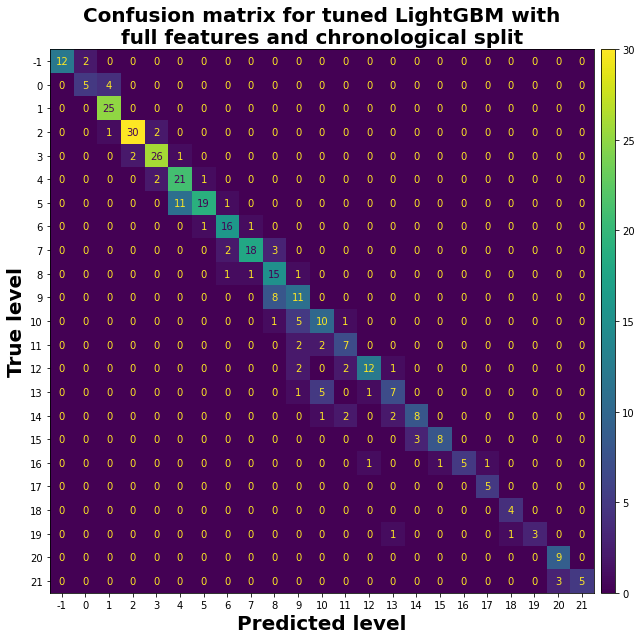

In [29]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nfull features and chronological split",
    export=True,
)

## Random split

In [30]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)
lgb_eval = lgb.Dataset(X_test_random_split, y_test_random_split, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 904, number of used features: 48
[LightGBM] [Info] Start training from score 7.162611
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's l1: 0.246737	valid_0's l2: 0.1379


In [31]:
y_pred_train = gbm.predict(X_train_random_split, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test_random_split, num_iteration=gbm.best_iteration)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test_random_split, y_pred_test, squared=False)
mae = mean_absolute_error(y_test_random_split, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.37
MAE: 0.25


In [33]:
results.loc[2] = ["random", "default", "full", rmse, mae]

###### MAE by level

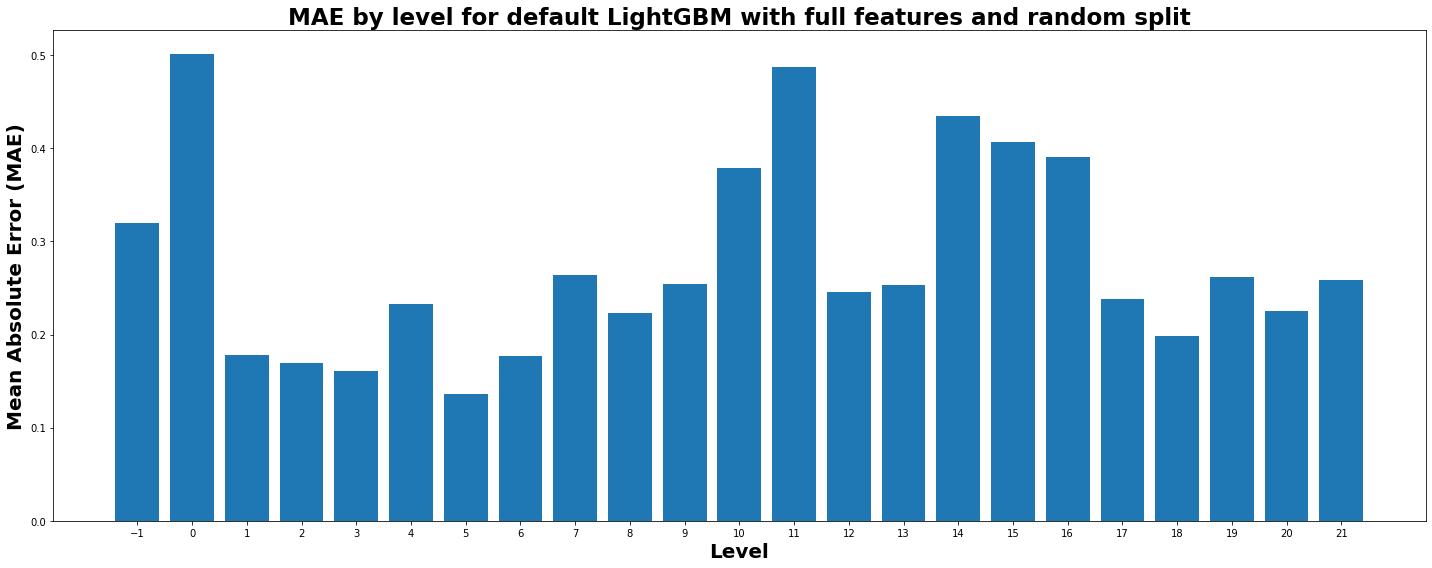

In [34]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for default LightGBM with full features and random split",
)

In [35]:
evaluate_round_predictions([0.5, 0.33, 0.45], y_test_random_split, y_pred_test)

Default:
RMSE: 0.37

Round type: 0.5
RMSE: 0.38

Round type: 0.33
RMSE: 0.43

Round type: 0.45
RMSE: 0.38



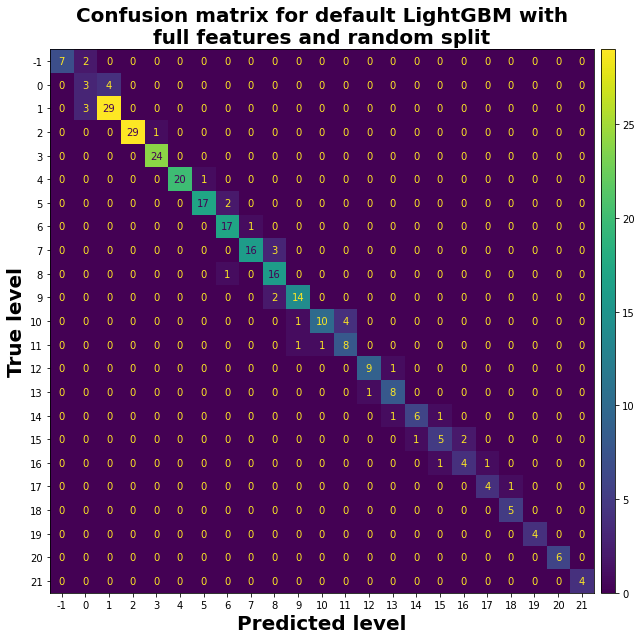

In [36]:
plot_confusion_matrix(
    y_pred_test,
    y_test_random_split,
    title="Confusion matrix for default LightGBM with\nfull features and random split",
)

### Tuning

In [37]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-11-24 15:03:12,045] A new study created in memory with name: no-name-08a99f06-e841-406b-9134-26e891818583
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.161741 + 0.0396899
[200]	cv_agg's l2: 0.158315 + 0.0385642
[300]	cv_agg's l2: 0.157002 + 0.0374871
[400]	cv_agg's l2: 0.1566 + 0.0375648
[500]	cv_agg's l2: 0.15648 + 0.0372376
[600]	cv_agg's l2: 0.15642 + 0.0371857
[700]	cv_agg's l2: 0.156341 + 0.0370476
[800]	cv_agg's l2: 0.156221 + 0.0369429
[900]	cv_agg's l2: 0.156202 + 0.0368766
[1000]	cv_agg's l2: 0.156195 + 0.0368692


feature_fraction, val_score: 0.156181:  14%|######4                                      | 1/7 [00:12<01:13, 12.17s/it]

Early stopping, best iteration is:
[972]	cv_agg's l2: 0.156181 + 0.0368379
[100]	cv_agg's l2: 0.168957 + 0.0408028
[200]	cv_agg's l2: 0.163705 + 0.0406069
[300]	cv_agg's l2: 0.162394 + 0.0405902
[400]	cv_agg's l2: 0.161684 + 0.0405616
[500]	cv_agg's l2: 0.161292 + 0.0403371
[600]	cv_agg's l2: 0.161219 + 0.0402206
[700]	cv_agg's l2: 0.161136 + 0.04013
[800]	cv_agg's l2: 0.161058 + 0.0400737
[900]	cv_agg's l2: 0.161005 + 0.0399498
[1000]	cv_agg's l2: 0.16092 + 0.0398148


feature_fraction, val_score: 0.156181:  29%|############8                                | 2/7 [00:25<01:02, 12.56s/it]

Early stopping, best iteration is:
[972]	cv_agg's l2: 0.156181 + 0.0368379
[100]	cv_agg's l2: 0.170856 + 0.0440617
[200]	cv_agg's l2: 0.167646 + 0.0418728
[300]	cv_agg's l2: 0.165882 + 0.0405016
[400]	cv_agg's l2: 0.165258 + 0.0402562
[500]	cv_agg's l2: 0.164887 + 0.039861
[600]	cv_agg's l2: 0.164908 + 0.039662
[700]	cv_agg's l2: 0.164938 + 0.039696
[800]	cv_agg's l2: 0.164865 + 0.039649
[900]	cv_agg's l2: 0.164818 + 0.0396452
[1000]	cv_agg's l2: 0.164765 + 0.0396197


feature_fraction, val_score: 0.156181:  43%|###################2                         | 3/7 [00:37<00:49, 12.43s/it]

Early stopping, best iteration is:
[972]	cv_agg's l2: 0.156181 + 0.0368379
[100]	cv_agg's l2: 0.172292 + 0.0524739
[200]	cv_agg's l2: 0.167818 + 0.0492435
[300]	cv_agg's l2: 0.166399 + 0.0480984
[400]	cv_agg's l2: 0.165519 + 0.0477015
[500]	cv_agg's l2: 0.1654 + 0.0475794
[600]	cv_agg's l2: 0.165373 + 0.0474012
[700]	cv_agg's l2: 0.165315 + 0.0473379
[800]	cv_agg's l2: 0.165188 + 0.0473396
[900]	cv_agg's l2: 0.165162 + 0.0472975
[1000]	cv_agg's l2: 0.165115 + 0.0472795


feature_fraction, val_score: 0.156181:  57%|#########################7                   | 4/7 [00:49<00:36, 12.29s/it]

Early stopping, best iteration is:
[972]	cv_agg's l2: 0.156181 + 0.0368379
[100]	cv_agg's l2: 0.168595 + 0.0264992
[200]	cv_agg's l2: 0.163125 + 0.0268834
[300]	cv_agg's l2: 0.162684 + 0.0265312
[400]	cv_agg's l2: 0.162138 + 0.0269268
[500]	cv_agg's l2: 0.161974 + 0.0270111
[600]	cv_agg's l2: 0.161797 + 0.0269038
[700]	cv_agg's l2: 0.161734 + 0.0268498
[800]	cv_agg's l2: 0.1616 + 0.026828
[900]	cv_agg's l2: 0.161554 + 0.0268372
[1000]	cv_agg's l2: 0.161498 + 0.0268338


feature_fraction, val_score: 0.156181:  71%|################################1            | 5/7 [01:02<00:25, 12.64s/it]

Early stopping, best iteration is:
[972]	cv_agg's l2: 0.156181 + 0.0368379
[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313
[800]	cv_agg's l2: 0.152708 + 0.0223141


feature_fraction, val_score: 0.152677:  86%|######################################5      | 6/7 [01:13<00:12, 12.07s/it]

[900]	cv_agg's l2: 0.152701 + 0.0222699
Early stopping, best iteration is:
[815]	cv_agg's l2: 0.152677 + 0.0222887
[100]	cv_agg's l2: 0.172668 + 0.0412758
[200]	cv_agg's l2: 0.168014 + 0.0392469
[300]	cv_agg's l2: 0.16694 + 0.0385005
[400]	cv_agg's l2: 0.166557 + 0.0382199
[500]	cv_agg's l2: 0.166368 + 0.0379503
[600]	cv_agg's l2: 0.166449 + 0.0377921
[700]	cv_agg's l2: 0.166427 + 0.037745
[800]	cv_agg's l2: 0.166391 + 0.0376808


feature_fraction, val_score: 0.152677: 100%|#############################################| 7/7 [01:24<00:00, 12.09s/it]


[900]	cv_agg's l2: 0.166458 + 0.0376509
Early stopping, best iteration is:
[815]	cv_agg's l2: 0.152677 + 0.0222887


num_leaves, val_score: 0.152677:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313
[800]	cv_agg's l2: 0.152708 + 0.0223141
[900]	cv_agg's l2: 0.152701 + 0.0222699
Early stopping, best iteration is:
[815]	cv_agg's l2: 0.152677 + 0.0222887


num_leaves, val_score: 0.152677:   5%|##5                                               | 1/20 [00:12<04:05, 12.94s/it]

[100]	cv_agg's l2: 0.155002 + 0.0213552
[200]	cv_agg's l2: 0.149384 + 0.0190737
[300]	cv_agg's l2: 0.147939 + 0.0199268
[400]	cv_agg's l2: 0.147574 + 0.0203313
[500]	cv_agg's l2: 0.147406 + 0.0201882
[600]	cv_agg's l2: 0.147405 + 0.0203103
[700]	cv_agg's l2: 0.147309 + 0.0203658


num_leaves, val_score: 0.147299:  10%|#####                                             | 2/20 [00:20<03:00, 10.00s/it]

[800]	cv_agg's l2: 0.147307 + 0.0204949
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313


num_leaves, val_score: 0.147299:  15%|#######5                                          | 3/20 [00:29<02:39,  9.38s/it]

[800]	cv_agg's l2: 0.152708 + 0.0223141
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.355928 + 0.0845296
[200]	cv_agg's l2: 0.296933 + 0.0681709
[300]	cv_agg's l2: 0.274164 + 0.0603741
[400]	cv_agg's l2: 0.262921 + 0.0562308
[500]	cv_agg's l2: 0.254936 + 0.0545333
[600]	cv_agg's l2: 0.248721 + 0.0530649
[700]	cv_agg's l2: 0.244159 + 0.0519441


num_leaves, val_score: 0.147299:  20%|##########                                        | 4/20 [00:31<01:42,  6.43s/it]

[800]	cv_agg's l2: 0.239558 + 0.0508837
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.175191 + 0.0243665
[200]	cv_agg's l2: 0.161914 + 0.0246132
[300]	cv_agg's l2: 0.157607 + 0.0246892
[400]	cv_agg's l2: 0.154461 + 0.0247379
[500]	cv_agg's l2: 0.153285 + 0.0250875
[600]	cv_agg's l2: 0.152467 + 0.0257439
[700]	cv_agg's l2: 0.152226 + 0.0255893


num_leaves, val_score: 0.147299:  25%|############5                                     | 5/20 [00:36<01:26,  5.77s/it]

[800]	cv_agg's l2: 0.152309 + 0.0255976
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.16484 + 0.0277092
[200]	cv_agg's l2: 0.154881 + 0.0267789
[300]	cv_agg's l2: 0.151897 + 0.0265675
[400]	cv_agg's l2: 0.150669 + 0.0263589
[500]	cv_agg's l2: 0.150523 + 0.0266751
[600]	cv_agg's l2: 0.150315 + 0.0262922
[700]	cv_agg's l2: 0.150196 + 0.0261717


num_leaves, val_score: 0.147299:  30%|###############                                   | 6/20 [00:41<01:19,  5.66s/it]

[800]	cv_agg's l2: 0.150419 + 0.0263749
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313


num_leaves, val_score: 0.147299:  35%|#################5                                | 7/20 [00:52<01:35,  7.32s/it]

[800]	cv_agg's l2: 0.152708 + 0.0223141
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313


num_leaves, val_score: 0.147299:  40%|####################                              | 8/20 [01:03<01:41,  8.44s/it]

[800]	cv_agg's l2: 0.152708 + 0.0223141
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313


num_leaves, val_score: 0.147299:  45%|######################5                           | 9/20 [01:13<01:38,  8.98s/it]

[800]	cv_agg's l2: 0.152708 + 0.0223141
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313


num_leaves, val_score: 0.147299:  50%|########################5                        | 10/20 [01:23<01:33,  9.35s/it]

[800]	cv_agg's l2: 0.152708 + 0.0223141
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313


num_leaves, val_score: 0.147299:  55%|##########################9                      | 11/20 [01:33<01:25,  9.45s/it]

[800]	cv_agg's l2: 0.152708 + 0.0223141
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313


num_leaves, val_score: 0.147299:  60%|#############################4                   | 12/20 [01:42<01:15,  9.47s/it]

[800]	cv_agg's l2: 0.152708 + 0.0223141
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313


num_leaves, val_score: 0.147299:  65%|###############################8                 | 13/20 [01:52<01:06,  9.47s/it]

[800]	cv_agg's l2: 0.152708 + 0.0223141
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313


num_leaves, val_score: 0.147299:  70%|##################################3              | 14/20 [02:01<00:57,  9.60s/it]

[800]	cv_agg's l2: 0.152708 + 0.0223141
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.355928 + 0.0845296
[200]	cv_agg's l2: 0.296933 + 0.0681709
[300]	cv_agg's l2: 0.274164 + 0.0603741
[400]	cv_agg's l2: 0.262921 + 0.0562308
[500]	cv_agg's l2: 0.254936 + 0.0545333
[600]	cv_agg's l2: 0.248721 + 0.0530649
[700]	cv_agg's l2: 0.244159 + 0.0519441


num_leaves, val_score: 0.147299:  75%|####################################7            | 15/20 [02:04<00:37,  7.44s/it]

[800]	cv_agg's l2: 0.239558 + 0.0508837
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.157352 + 0.0212672
[200]	cv_agg's l2: 0.151732 + 0.0206654
[300]	cv_agg's l2: 0.150036 + 0.0217114
[400]	cv_agg's l2: 0.149737 + 0.0219591
[500]	cv_agg's l2: 0.149544 + 0.0221598
[600]	cv_agg's l2: 0.149274 + 0.0220876
[700]	cv_agg's l2: 0.149146 + 0.021991


num_leaves, val_score: 0.147299:  80%|#######################################2         | 16/20 [02:13<00:31,  7.87s/it]

[800]	cv_agg's l2: 0.149063 + 0.022055
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313


num_leaves, val_score: 0.147299:  85%|#########################################6       | 17/20 [02:23<00:25,  8.50s/it]

[800]	cv_agg's l2: 0.152708 + 0.0223141
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313


num_leaves, val_score: 0.147299:  90%|############################################1    | 18/20 [02:33<00:17,  8.88s/it]

[800]	cv_agg's l2: 0.152708 + 0.0223141
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.158979 + 0.022895
[200]	cv_agg's l2: 0.152904 + 0.0223865
[300]	cv_agg's l2: 0.151382 + 0.0236074
[400]	cv_agg's l2: 0.150842 + 0.0244747
[500]	cv_agg's l2: 0.150433 + 0.0244089
[600]	cv_agg's l2: 0.150096 + 0.0245645
[700]	cv_agg's l2: 0.149891 + 0.0244787


num_leaves, val_score: 0.147299:  95%|##############################################5  | 19/20 [02:42<00:09,  9.13s/it]

[800]	cv_agg's l2: 0.149791 + 0.0245545
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.16038 + 0.0198336
[200]	cv_agg's l2: 0.154897 + 0.0209446
[300]	cv_agg's l2: 0.154065 + 0.0219449
[400]	cv_agg's l2: 0.153557 + 0.022534
[500]	cv_agg's l2: 0.153064 + 0.0224325
[600]	cv_agg's l2: 0.152897 + 0.0224461
[700]	cv_agg's l2: 0.152739 + 0.022313


num_leaves, val_score: 0.147299: 100%|#################################################| 20/20 [02:53<00:00,  8.65s/it]


[800]	cv_agg's l2: 0.152708 + 0.0223141
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485


bagging, val_score: 0.147299:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.181547 + 0.0282657
[200]	cv_agg's l2: 0.177524 + 0.0279997
[300]	cv_agg's l2: 0.17312 + 0.0278014
[400]	cv_agg's l2: 0.172064 + 0.0280621
[500]	cv_agg's l2: 0.171696 + 0.0287261
[600]	cv_agg's l2: 0.170976 + 0.0285706
[700]	cv_agg's l2: 0.170439 + 0.0287368


bagging, val_score: 0.147299:  10%|#####3                                               | 1/10 [00:07<01:10,  7.79s/it]

[800]	cv_agg's l2: 0.170588 + 0.029448
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.236937 + 0.0229736
[200]	cv_agg's l2: 0.226303 + 0.0189368
[300]	cv_agg's l2: 0.221612 + 0.0168796
[400]	cv_agg's l2: 0.21591 + 0.0147153
[500]	cv_agg's l2: 0.213766 + 0.0128943
[600]	cv_agg's l2: 0.210427 + 0.0167635
[700]	cv_agg's l2: 0.209346 + 0.0167962


bagging, val_score: 0.147299:  20%|##########6                                          | 2/10 [00:13<00:53,  6.74s/it]

[800]	cv_agg's l2: 0.209179 + 0.016317
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.17043 + 0.0194606
[200]	cv_agg's l2: 0.161704 + 0.0185579
[300]	cv_agg's l2: 0.15976 + 0.0191814
[400]	cv_agg's l2: 0.159432 + 0.0200553
[500]	cv_agg's l2: 0.159453 + 0.020482
[600]	cv_agg's l2: 0.15935 + 0.0203201
[700]	cv_agg's l2: 0.159171 + 0.0203686


bagging, val_score: 0.147299:  30%|###############9                                     | 3/10 [00:22<00:52,  7.54s/it]

[800]	cv_agg's l2: 0.159191 + 0.0203793
Early stopping, best iteration is:
[702]	cv_agg's l2: 0.147299 + 0.0203485
[100]	cv_agg's l2: 0.156162 + 0.0188695
[200]	cv_agg's l2: 0.147597 + 0.017973
[300]	cv_agg's l2: 0.146465 + 0.0181998
[400]	cv_agg's l2: 0.145541 + 0.0182373
[500]	cv_agg's l2: 0.145449 + 0.0184756
[600]	cv_agg's l2: 0.145409 + 0.0186846
[700]	cv_agg's l2: 0.145274 + 0.01873


bagging, val_score: 0.145220:  40%|#####################2                               | 4/10 [00:30<00:46,  7.78s/it]

Early stopping, best iteration is:
[662]	cv_agg's l2: 0.14522 + 0.0186475
[100]	cv_agg's l2: 0.155002 + 0.0213552
[200]	cv_agg's l2: 0.149384 + 0.0190737
[300]	cv_agg's l2: 0.147939 + 0.0199268
[400]	cv_agg's l2: 0.147574 + 0.0203313
[500]	cv_agg's l2: 0.147406 + 0.0201882
[600]	cv_agg's l2: 0.147405 + 0.0203103
[700]	cv_agg's l2: 0.147309 + 0.0203658


bagging, val_score: 0.145220:  50%|##########################5                          | 5/10 [00:38<00:39,  7.92s/it]

Early stopping, best iteration is:
[662]	cv_agg's l2: 0.14522 + 0.0186475
[100]	cv_agg's l2: 0.155002 + 0.0213552
[200]	cv_agg's l2: 0.149384 + 0.0190737
[300]	cv_agg's l2: 0.147939 + 0.0199268
[400]	cv_agg's l2: 0.147574 + 0.0203313
[500]	cv_agg's l2: 0.147406 + 0.0201882
[600]	cv_agg's l2: 0.147405 + 0.0203103
[700]	cv_agg's l2: 0.147309 + 0.0203658


bagging, val_score: 0.145220:  60%|###############################8                     | 6/10 [00:47<00:32,  8.17s/it]

Early stopping, best iteration is:
[662]	cv_agg's l2: 0.14522 + 0.0186475
[100]	cv_agg's l2: 0.159226 + 0.0187981
[200]	cv_agg's l2: 0.151829 + 0.0187106
[300]	cv_agg's l2: 0.149344 + 0.0193728
[400]	cv_agg's l2: 0.148364 + 0.0198476
[500]	cv_agg's l2: 0.147975 + 0.0201113
[600]	cv_agg's l2: 0.147909 + 0.0201223
[700]	cv_agg's l2: 0.147788 + 0.0200793


bagging, val_score: 0.145220:  70%|#####################################                | 7/10 [00:56<00:25,  8.45s/it]

Early stopping, best iteration is:
[662]	cv_agg's l2: 0.14522 + 0.0186475
[100]	cv_agg's l2: 0.170907 + 0.0215044
[200]	cv_agg's l2: 0.161935 + 0.0205817
[300]	cv_agg's l2: 0.159756 + 0.0205776
[400]	cv_agg's l2: 0.158224 + 0.0204792
[500]	cv_agg's l2: 0.157486 + 0.0205027
[600]	cv_agg's l2: 0.157115 + 0.0207256
[700]	cv_agg's l2: 0.156957 + 0.0206973


bagging, val_score: 0.145220:  80%|##########################################4          | 8/10 [01:05<00:17,  8.64s/it]

Early stopping, best iteration is:
[662]	cv_agg's l2: 0.14522 + 0.0186475
[100]	cv_agg's l2: 0.165549 + 0.0248658
[200]	cv_agg's l2: 0.156753 + 0.0231447
[300]	cv_agg's l2: 0.154668 + 0.0238304
[400]	cv_agg's l2: 0.153787 + 0.0240923
[500]	cv_agg's l2: 0.15356 + 0.024152
[600]	cv_agg's l2: 0.153381 + 0.0241482
[700]	cv_agg's l2: 0.153331 + 0.0242028


bagging, val_score: 0.145220:  90%|###############################################7     | 9/10 [01:14<00:08,  8.69s/it]

Early stopping, best iteration is:
[662]	cv_agg's l2: 0.14522 + 0.0186475
[100]	cv_agg's l2: 0.169732 + 0.0262106
[200]	cv_agg's l2: 0.162537 + 0.0279898
[300]	cv_agg's l2: 0.159498 + 0.0290893
[400]	cv_agg's l2: 0.158816 + 0.0303782
[500]	cv_agg's l2: 0.158019 + 0.0304109
[600]	cv_agg's l2: 0.15731 + 0.0305056
[700]	cv_agg's l2: 0.156927 + 0.0307901


bagging, val_score: 0.145220: 100%|####################################################| 10/10 [01:21<00:00,  8.20s/it]


Early stopping, best iteration is:
[662]	cv_agg's l2: 0.14522 + 0.0186475


feature_fraction_stage2, val_score: 0.145220:   0%|                                              | 0/3 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.164995 + 0.020705
[200]	cv_agg's l2: 0.157918 + 0.0220887
[300]	cv_agg's l2: 0.156393 + 0.0222658
[400]	cv_agg's l2: 0.155579 + 0.022516
[500]	cv_agg's l2: 0.15539 + 0.0225093
[600]	cv_agg's l2: 0.1552 + 0.0225619
[700]	cv_agg's l2: 0.155034 + 0.0224985


feature_fraction_stage2, val_score: 0.145220:  33%|############6                         | 1/3 [00:08<00:17,  8.68s/it]

Early stopping, best iteration is:
[662]	cv_agg's l2: 0.14522 + 0.0186475
[100]	cv_agg's l2: 0.158171 + 0.0163104
[200]	cv_agg's l2: 0.150946 + 0.0174696
[300]	cv_agg's l2: 0.149254 + 0.017582
[400]	cv_agg's l2: 0.148339 + 0.0180907
[500]	cv_agg's l2: 0.147787 + 0.0183249
[600]	cv_agg's l2: 0.147664 + 0.0182861
[700]	cv_agg's l2: 0.147396 + 0.0182568


feature_fraction_stage2, val_score: 0.145220:  67%|#########################3            | 2/3 [00:16<00:08,  8.25s/it]

Early stopping, best iteration is:
[662]	cv_agg's l2: 0.14522 + 0.0186475
[100]	cv_agg's l2: 0.164892 + 0.0253403
[200]	cv_agg's l2: 0.159293 + 0.0259316
[300]	cv_agg's l2: 0.157931 + 0.0259088
[400]	cv_agg's l2: 0.157122 + 0.0260373
[500]	cv_agg's l2: 0.156953 + 0.0260851
[600]	cv_agg's l2: 0.156856 + 0.0261341
[700]	cv_agg's l2: 0.156764 + 0.0261188


feature_fraction_stage2, val_score: 0.145220: 100%|######################################| 3/3 [00:25<00:00,  8.51s/it]


Early stopping, best iteration is:
[662]	cv_agg's l2: 0.14522 + 0.0186475


regularization_factors, val_score: 0.145220:   0%|                                              | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145669 + 0.018682
[400]	cv_agg's l2: 0.144852 + 0.0187609
[500]	cv_agg's l2: 0.144757 + 0.0191629


regularization_factors, val_score: 0.144667:   5%|#9                                    | 1/20 [00:06<02:11,  6.91s/it]

[600]	cv_agg's l2: 0.144914 + 0.0192725
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144667 + 0.0191712
[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145669 + 0.018682
[400]	cv_agg's l2: 0.144852 + 0.0187609
[500]	cv_agg's l2: 0.144734 + 0.0191325


regularization_factors, val_score: 0.144628:  10%|###8                                  | 2/20 [00:13<02:04,  6.94s/it]

[600]	cv_agg's l2: 0.144863 + 0.0192064
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145669 + 0.018682
[400]	cv_agg's l2: 0.144852 + 0.0187609
[500]	cv_agg's l2: 0.144734 + 0.0191325


regularization_factors, val_score: 0.144628:  15%|#####7                                | 3/20 [00:20<01:57,  6.92s/it]

[600]	cv_agg's l2: 0.144863 + 0.0192064
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145669 + 0.018682
[400]	cv_agg's l2: 0.144852 + 0.0187609
[500]	cv_agg's l2: 0.144734 + 0.0191325


regularization_factors, val_score: 0.144628:  20%|#######6                              | 4/20 [00:27<01:49,  6.87s/it]

[600]	cv_agg's l2: 0.144863 + 0.0192064
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145669 + 0.018682
[400]	cv_agg's l2: 0.144852 + 0.0187609
[500]	cv_agg's l2: 0.144734 + 0.0191325


regularization_factors, val_score: 0.144628:  25%|#########5                            | 5/20 [00:34<01:43,  6.90s/it]

[600]	cv_agg's l2: 0.144863 + 0.0192064
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145669 + 0.018682
[400]	cv_agg's l2: 0.144852 + 0.0187609
[500]	cv_agg's l2: 0.144734 + 0.0191325


regularization_factors, val_score: 0.144628:  30%|###########4                          | 6/20 [00:41<01:35,  6.86s/it]

[600]	cv_agg's l2: 0.144863 + 0.0192064
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145669 + 0.018682
[400]	cv_agg's l2: 0.144852 + 0.0187609
[500]	cv_agg's l2: 0.144734 + 0.0191325


regularization_factors, val_score: 0.144628:  35%|#############3                        | 7/20 [00:48<01:32,  7.09s/it]

[600]	cv_agg's l2: 0.144863 + 0.0192064
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145669 + 0.018682
[400]	cv_agg's l2: 0.144852 + 0.0187609
[500]	cv_agg's l2: 0.144734 + 0.0191325


regularization_factors, val_score: 0.144628:  40%|###############2                      | 8/20 [00:55<01:23,  7.00s/it]

[600]	cv_agg's l2: 0.144863 + 0.0192064
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145669 + 0.018682
[400]	cv_agg's l2: 0.144852 + 0.0187609
[500]	cv_agg's l2: 0.144734 + 0.0191325


regularization_factors, val_score: 0.144628:  45%|#################1                    | 9/20 [01:01<01:13,  6.70s/it]

[600]	cv_agg's l2: 0.144863 + 0.0192064
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.156162 + 0.0188695
[200]	cv_agg's l2: 0.147597 + 0.017973
[300]	cv_agg's l2: 0.146277 + 0.0183167
[400]	cv_agg's l2: 0.145323 + 0.0183759
[500]	cv_agg's l2: 0.145048 + 0.0187573


regularization_factors, val_score: 0.144628:  50%|##################5                  | 10/20 [01:08<01:06,  6.69s/it]

[600]	cv_agg's l2: 0.145062 + 0.0188843
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.156162 + 0.0188695
[200]	cv_agg's l2: 0.147597 + 0.017973
[300]	cv_agg's l2: 0.146277 + 0.0183167
[400]	cv_agg's l2: 0.145325 + 0.018373
[500]	cv_agg's l2: 0.145079 + 0.0187088


regularization_factors, val_score: 0.144628:  55%|####################3                | 11/20 [01:15<01:00,  6.68s/it]

[600]	cv_agg's l2: 0.145035 + 0.018925
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145669 + 0.018682
[400]	cv_agg's l2: 0.144852 + 0.0187609
[500]	cv_agg's l2: 0.144757 + 0.0191629


regularization_factors, val_score: 0.144628:  60%|######################2              | 12/20 [01:21<00:52,  6.60s/it]

[600]	cv_agg's l2: 0.144914 + 0.0192725
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145669 + 0.018682
[400]	cv_agg's l2: 0.144852 + 0.0187609
[500]	cv_agg's l2: 0.144757 + 0.0191629


regularization_factors, val_score: 0.144628:  65%|########################             | 13/20 [01:28<00:47,  6.81s/it]

[600]	cv_agg's l2: 0.144914 + 0.0192725
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.158 + 0.0214493
[200]	cv_agg's l2: 0.151683 + 0.0220314
[300]	cv_agg's l2: 0.149819 + 0.022735
[400]	cv_agg's l2: 0.14869 + 0.0231533
[500]	cv_agg's l2: 0.148367 + 0.0233236


regularization_factors, val_score: 0.144628:  70%|#########################9           | 14/20 [01:35<00:40,  6.82s/it]

[600]	cv_agg's l2: 0.148141 + 0.0233838
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.15512 + 0.0194429
[200]	cv_agg's l2: 0.147955 + 0.0175051
[300]	cv_agg's l2: 0.146505 + 0.0175325
[400]	cv_agg's l2: 0.146113 + 0.0173771
[500]	cv_agg's l2: 0.145974 + 0.0178951


regularization_factors, val_score: 0.144628:  75%|###########################7         | 15/20 [01:43<00:35,  7.03s/it]

[600]	cv_agg's l2: 0.145825 + 0.0180975
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.164418 + 0.027236
[200]	cv_agg's l2: 0.156781 + 0.0254933
[300]	cv_agg's l2: 0.153639 + 0.0259839
[400]	cv_agg's l2: 0.152727 + 0.0263415
[500]	cv_agg's l2: 0.152281 + 0.0264276


regularization_factors, val_score: 0.144628:  80%|#############################6       | 16/20 [01:49<00:27,  6.93s/it]

[600]	cv_agg's l2: 0.152092 + 0.0264419
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.15512 + 0.0194429
[200]	cv_agg's l2: 0.147955 + 0.0175051
[300]	cv_agg's l2: 0.146366 + 0.0174678
[400]	cv_agg's l2: 0.146041 + 0.0173438
[500]	cv_agg's l2: 0.146014 + 0.017833


regularization_factors, val_score: 0.144628:  85%|###############################4     | 17/20 [01:56<00:20,  6.88s/it]

[600]	cv_agg's l2: 0.145841 + 0.0179527
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.144628 + 0.0191197
[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145717 + 0.0187048
[400]	cv_agg's l2: 0.144805 + 0.0187384
[500]	cv_agg's l2: 0.144602 + 0.0190703


regularization_factors, val_score: 0.144500:  90%|#################################3   | 18/20 [02:03<00:13,  6.87s/it]

[600]	cv_agg's l2: 0.144711 + 0.0191348
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.1445 + 0.0190602
[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145717 + 0.0187048
[400]	cv_agg's l2: 0.144807 + 0.0187356
[500]	cv_agg's l2: 0.144633 + 0.0190234


regularization_factors, val_score: 0.144500:  95%|###################################1 | 19/20 [02:10<00:06,  6.92s/it]

[600]	cv_agg's l2: 0.144684 + 0.0191746
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.1445 + 0.0190602
[100]	cv_agg's l2: 0.155119 + 0.0194429
[200]	cv_agg's l2: 0.147324 + 0.0181519
[300]	cv_agg's l2: 0.145717 + 0.0187048
[400]	cv_agg's l2: 0.144807 + 0.0187356
[500]	cv_agg's l2: 0.144633 + 0.0190234


regularization_factors, val_score: 0.144500: 100%|#####################################| 20/20 [02:16<00:00,  6.84s/it]


[600]	cv_agg's l2: 0.144684 + 0.0191746
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.1445 + 0.0190602


min_data_in_leaf, val_score: 0.144500:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.162398 + 0.0271858
[200]	cv_agg's l2: 0.15846 + 0.0275962
[300]	cv_agg's l2: 0.157376 + 0.0279112
[400]	cv_agg's l2: 0.157137 + 0.0279251
[500]	cv_agg's l2: 0.156968 + 0.0276881


min_data_in_leaf, val_score: 0.144500:  20%|#########                                    | 1/5 [00:06<00:26,  6.53s/it]

[600]	cv_agg's l2: 0.156822 + 0.0275917
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.1445 + 0.0190602
[100]	cv_agg's l2: 0.672773 + 0.0573632
[200]	cv_agg's l2: 0.636088 + 0.0499773
[300]	cv_agg's l2: 0.616523 + 0.0528387
[400]	cv_agg's l2: 0.603676 + 0.0598406
[500]	cv_agg's l2: 0.594387 + 0.0613819


min_data_in_leaf, val_score: 0.144500:  40%|##################                           | 2/5 [00:09<00:13,  4.53s/it]

[600]	cv_agg's l2: 0.587103 + 0.062952
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.1445 + 0.0190602
[100]	cv_agg's l2: 0.235525 + 0.0224527
[200]	cv_agg's l2: 0.218113 + 0.0226175
[300]	cv_agg's l2: 0.213398 + 0.0234748
[400]	cv_agg's l2: 0.21179 + 0.0246074
[500]	cv_agg's l2: 0.210891 + 0.0250574


min_data_in_leaf, val_score: 0.144500:  60%|###########################                  | 3/5 [00:13<00:08,  4.30s/it]

[600]	cv_agg's l2: 0.21127 + 0.0250817
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.1445 + 0.0190602
[100]	cv_agg's l2: 0.1746 + 0.0243584
[200]	cv_agg's l2: 0.168498 + 0.0235241
[300]	cv_agg's l2: 0.165969 + 0.0233739
[400]	cv_agg's l2: 0.164382 + 0.023216
[500]	cv_agg's l2: 0.163891 + 0.0231371


min_data_in_leaf, val_score: 0.144500:  80%|####################################         | 4/5 [00:20<00:05,  5.26s/it]

[600]	cv_agg's l2: 0.163685 + 0.0234031
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.1445 + 0.0190602
[100]	cv_agg's l2: 0.158509 + 0.0291192
[200]	cv_agg's l2: 0.154644 + 0.0283938
[300]	cv_agg's l2: 0.153911 + 0.0282416
[400]	cv_agg's l2: 0.153789 + 0.028098
[500]	cv_agg's l2: 0.153763 + 0.0281177


min_data_in_leaf, val_score: 0.144500: 100%|#############################################| 5/5 [00:26<00:00,  5.37s/it]

[600]	cv_agg's l2: 0.153737 + 0.0281433
Early stopping, best iteration is:
[507]	cv_agg's l2: 0.1445 + 0.0190602


In [38]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.14450027966986828
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 1.2332561911697527e-07
    lambda_l2: 2.2673344833178607e-07
    num_leaves: 21
    feature_fraction: 0.4
    bagging_fraction: 0.9982055173299748
    bagging_freq: 7
    min_child_samples: 20


In [39]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [40]:
rmse, mae = assess_regression_model(
    lgb_tuned,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
)

RMSE train: 0.00
RMSE test: 0.32
MAE test: 0.23



In [41]:
results.loc[3] = ["random", "Optuna", "full", rmse, mae]

###### MAE by level

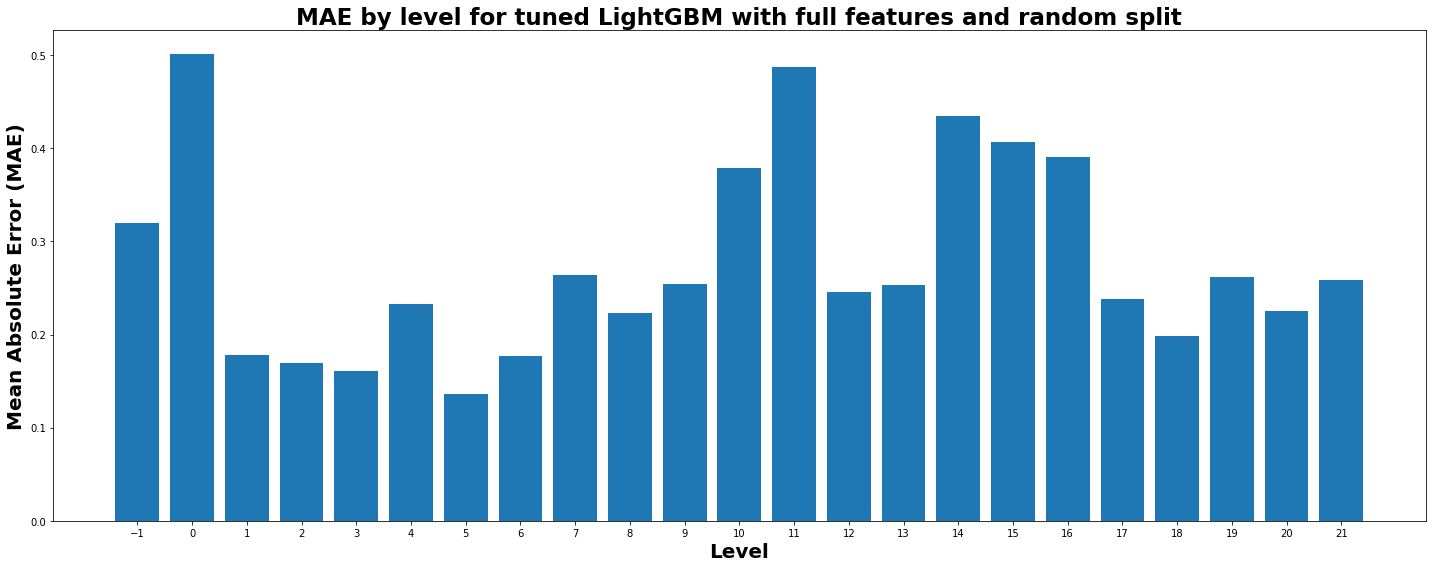

In [42]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for tuned LightGBM with full features and random split",
    export=True,
)

In [43]:
predict = lgb_tuned.predict(X_test)
evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.19

Round type: 0.5
RMSE: 0.20

Round type: 0.33
RMSE: 0.21

Round type: 0.45
RMSE: 0.21



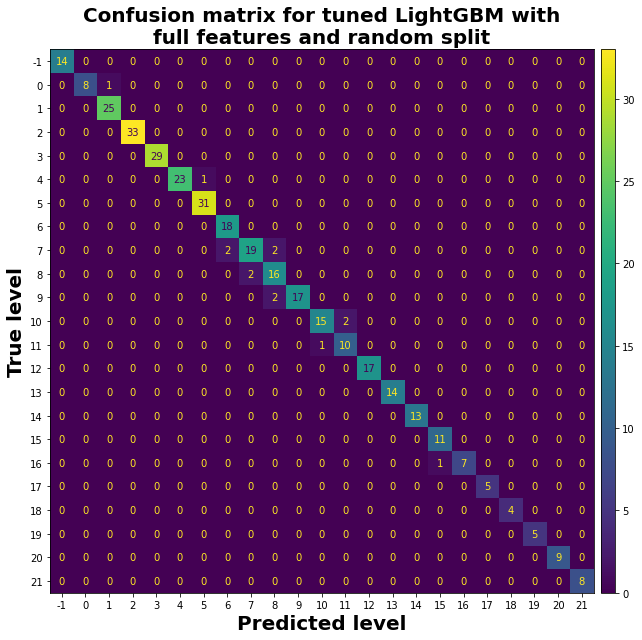

In [44]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nfull features and random split",
    export=True,
)

## Summary

In [45]:
results

,Split type,Tuning type,Set of features,RMSE,MAE
0,chronological,default,full,0.961949,0.464806
1,chronological,Optuna,full,0.803979,0.427331
2,random,default,full,0.371349,0.246737
3,random,Optuna,full,0.324906,0.228702


In [46]:
from training.results import plot_summary

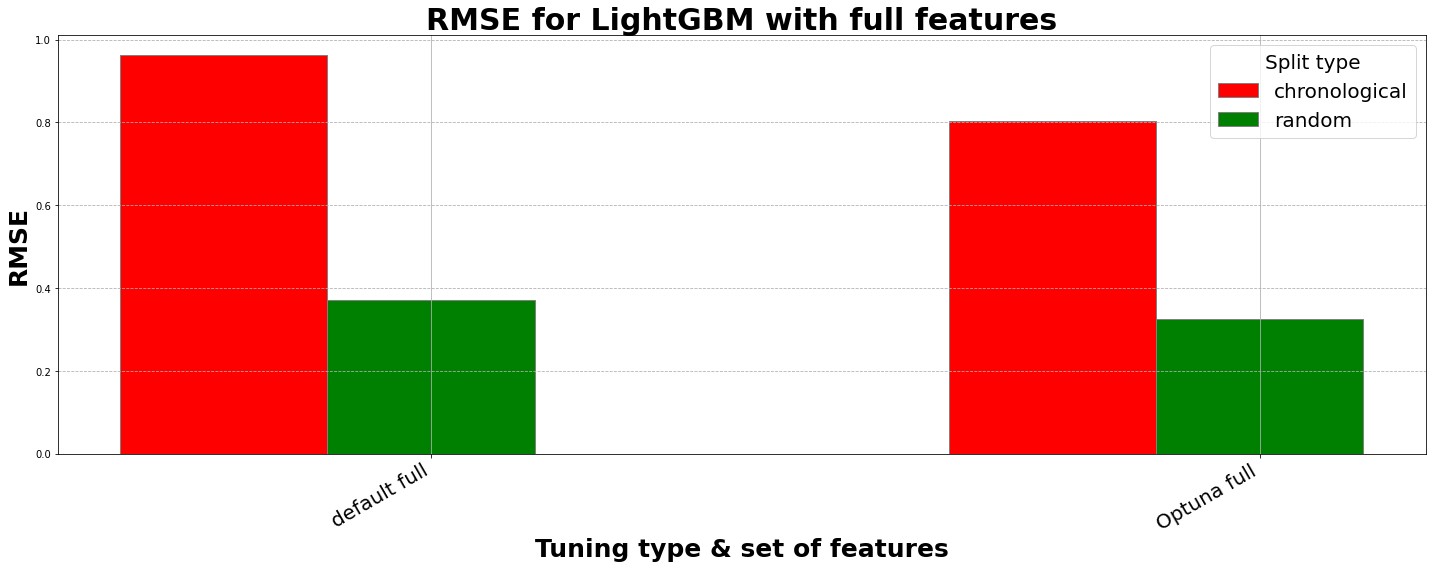

In [47]:
plot_summary(results, "RMSE", title="RMSE for LightGBM with full features")

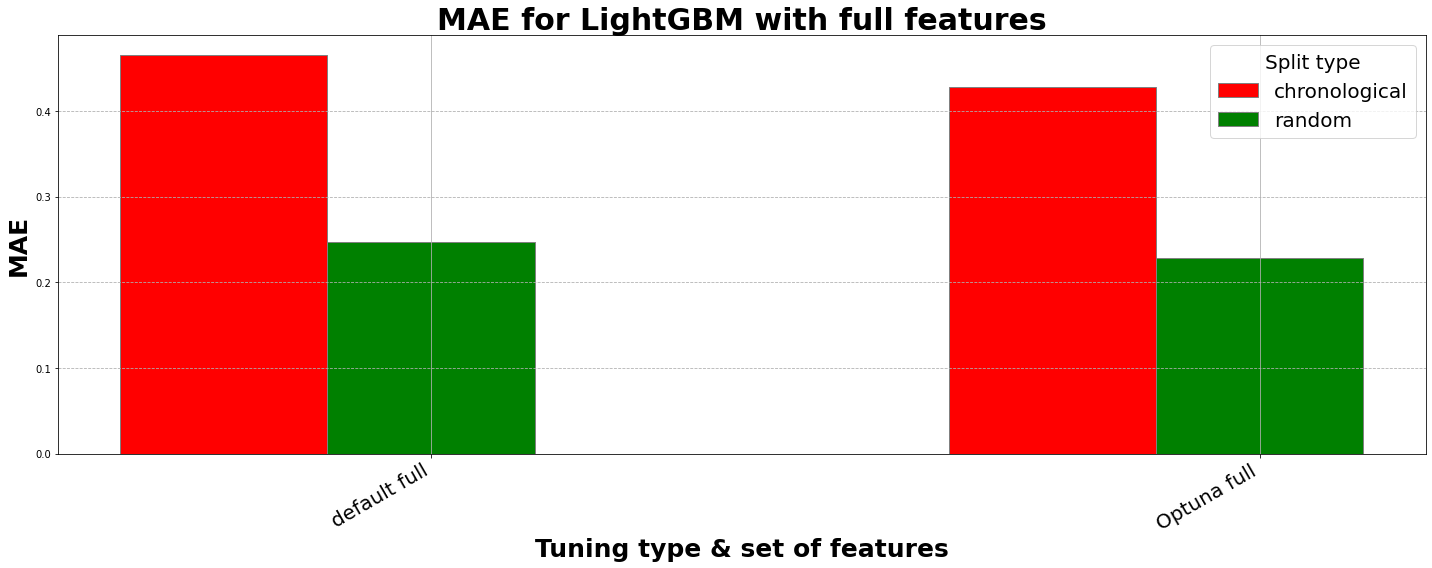

In [48]:
plot_summary(results, "MAE", title="MAE for LightGBM with full features")

In [49]:
results.to_csv("./lightgbm_full_results.csv")